### Importing all the necesarry libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats


#### Reading CSV files

In [2]:
Salary = pd.read_csv('salary.csv')
Salary_metadata=pd.read_csv('Salary metadata.csv',sep='\t')

In [3]:
Salary_metadata.head(30)

,Variable;Type;Explanation
0,salary;Continuous;Annual salary in dollars
1,exprior;Continuous;Years of experience prior t...
2,yearsworked;Continuous;Years worked in this field
3,yearsrank;Continuous;Years worked at current r...
4,market;Continuous;Market value (1 = salary at ...
5,"degree;Binary;Has degree (0 = no, 1 = yes)"
6,otherqual;Binary;Has other post-secondary qual...
7,position;Categorical;Position (1 = Junior Empl...
8,"male;Binary;0 = no, 1 = yes"
9,Field;Categorical;Field of work (1 = Engineeri...


In [4]:
def printDataFrame(Salary_metadata):
    for i in range(len(Salary_metadata.index)):
        row = list(Salary_metadata.iloc[i])
        print("\t".join(map(str, row)))


In [5]:
printDataFrame(Salary_metadata)

salary;Continuous;Annual salary in dollars
exprior;Continuous;Years of experience prior to working in this field
yearsworked;Continuous;Years worked in this field
yearsrank;Continuous;Years worked at current rank 
market;Continuous;Market value (1 = salary at market value for position, <1 salary lower than market value for position, >1 salary higher than market value for position)
degree;Binary;Has degree (0 = no, 1 = yes)
otherqual;Binary;Has other post-secondary qualification (0 = no, 1 = yes)
position;Categorical;Position (1 = Junior Employee, 2 = Manager, 3 = Executive)
male;Binary;0 = no, 1 = yes
Field;Categorical;Field of work (1 = Engineering, 2 = Finance, 3 = Human Resources, 4 = Marketing)
yearsabs;Continuous;Years absent from work (e.g. due to illness / child rearing / personal reasons)


### Checking for missing values

#### 1. How many responders are there? Are there any missing values in any of the variables?

In [6]:
count = len(Salary['salary'])
count

514

In [7]:
print("Number of columns with missing values: {}".format(len(Salary.columns[Salary.isnull().any()])))

Number of columns with missing values: 1


In [8]:
[col for col in Salary.columns if Salary[col].isnull().any()]


['salary']

In [9]:
Salary[Salary.isnull().any(axis=1)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


#### From the results above, we can see that there are 514 observations and there is a missing value in the salary column.¶

In [10]:
Salary[Salary.isnull().any(axis=1)]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


### 2. What is the lowest salary and highest salary in the group?

In [11]:

Salary['salary'].min()

29000.0

In [12]:
Salary['salary'].max()

96156.0

#### From the results above:
#### We have the maximum salary as R96156 and¶
#### we have the minimum salary as R2900

### 3. What is the mean salary for the sample? Include the standard error of the mean.¶

In [13]:
mean_sal = Salary['salary'].mean()
round(mean_sal, 2)

50863.22

In [14]:
round(stats.sem(Salary['salary'], nan_policy = 'omit'), 2)

560.06

##### From the results above we have:
##### The mean salary as R50863 and the standard error of the mean salary is R560.06¶

### 4. What is the standard deviation for the years worked?

In [15]:
Salary['yearsworked'].std()

9.444695144169813

#### From the results above we have:
#### The standard deviation for the years worked is 9.44

### 5. What is the median salary for the sample?

In [16]:
Salary['salary'].median()

50096.0

#### From the results above we have:
#### The median for the salaries is R5096

In [17]:
# First quartile (Q1) 
Q1 = np.nanpercentile(Salary['salary'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.nanpercentile(Salary['salary'], 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
  
print(IQR)

20345.0


#### From the results above we have:
#### The interquartile range for the  salaries is R20345¶

#### The descriptive statistical values can be visually observed in a boxplot below

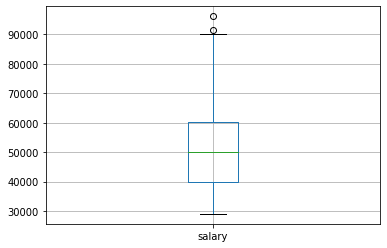

In [18]:
Salary.boxplot('salary')

### 7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.¶

#### Creating Gender column

In [19]:
Gender = {1: "Male", 0: "Female"}
Salary["Gender"] = Salary["male"].map(Gender)

#### Count the observations on Gender column

In [20]:
Salary['Gender'].value_counts()

Male      386
Female    128
Name: Gender, dtype: int64

#### From the above observations we have:

#### 386 number of males and 128 number of females who constitute on our observations.

In [21]:
Salary.tail(1)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Gender
513,52662.0,13,25,11,0.78,1,0,3,0,1,112,Female


### 8. How many women are executives compared to men?

##### Assigning Position as per the Salary_metadata Dataframe and creating a new "Position" column in Salary dataframe.

In [22]:
Position = {1: "Junior Employee", 2: "Manager", 3: "Executive"}
Salary["Position"] = Salary["position"].map(Position)

#### Extracting both male and female executive from Position and Gender column.

In [23]:
Exec = Salary[ Salary['Position']=='Executive']
fem_exec = Exec[Exec['Gender']=='Female']
male_exec = Exec[Exec['Gender']=='Male']
number_of_fem_exec = len(fem_exec)
number_of_male_exec = len(male_exec)


number_of_fem_exec


19

In [24]:
number_of_male_exec

192

#### From the above readings it can be observed that there are 192 number of males who occupy the role of executive and only 19 females occupy the role of executive.

### 9. Create a histogram for the variable Salary.

Text(0, 0.5, 'Number of People')

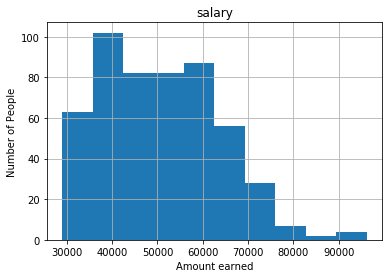

In [25]:
Salary.hist(column='salary')
plt.xlabel('Amount earned')
plt.ylabel('Number of People')

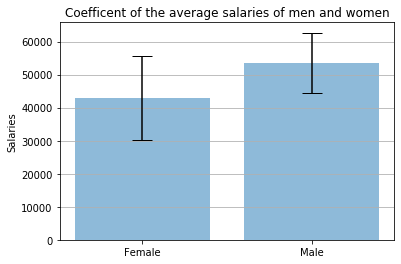

In [26]:
mean_sal = Salary.groupby('Gender')['salary'].mean()
mean_sal

std_sal = Salary.groupby('Gender')['salary'].std()
std_sal

female_mean_sal = mean_sal.loc['Female']
female_mean_sal

male_mean_sal= mean_sal.loc['Male']
male_mean_sal

female_std_sal = std_sal.loc['Male']
Male_std_sal = std_sal.loc['Female']
    
materials = ['Female', 'Male']
x_pos = np.arange(len(materials))
CTEs = [female_mean_sal, male_mean_sal]
error = [female_std_sal, Male_std_sal]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Salaries')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of the average salaries of men and women')
ax.yaxis.grid(True)

#Save the figure and show
#plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()   
    

### 12.1 Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).¶

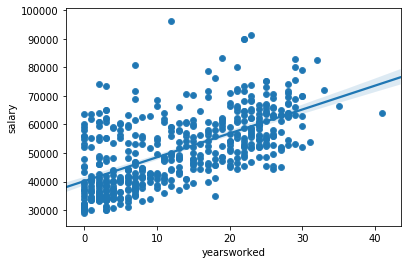

In [30]:
ax1 = Salary.plot.scatter(x='yearsworked',y='salary' )

ax = sns.scatterplot(x=Salary['yearsworked'], y=Salary['salary'], data=Salary)

ax = sns.regplot(x="yearsworked", y="salary", data=Salary)

### 12.2 What is the relationship between Years Worked and Salary?

### We can see from the graph above that there is a positive strong relationship between the number of years worked against the salaries thereof.¶


### 12.3 Describe any patterns in the scatterplot.Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)¶

#### Based on the plotted scatter plot, there is no pattern observed but ther are notable outliers that are influencing the regression line.These outliers could be individuals that posses higher experience and skills compared to the rest of other employees hence the higher income.

#### The below code illustrate that the persom who earns the most is an excutive male who has 20 years of experience prio the role of excutive.

#### And on the other hand we have and a male who earns the minimum amount of R29 000.0, This could be caused by the fact that he has no degree.




In [32]:
print(Salary[Salary.salary == Salary.salary.max()])

      salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
377  96156.0       20           12         12    1.19       1          0   

     position  male  Field  yearsabs Gender   Position  
377         3     1      1         2   Male  Executive  


In [31]:
print(Salary[Salary.salary == Salary.salary.min()])

     salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
79  29000.0        6            0          0    0.78       0          0   

    position  male  Field  yearsabs Gender         Position  
79         1     1      3         0   Male  Junior Employee  


### 13.1 Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.¶

In [ ]:
Salary['salary'] = Salary.fillna(0)  
scipy.stats.pearsonr(Salary['yearsworked'], Salary['salary'])

### 13.2 Interpret the size and direction of the correlation statistic.¶Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.¶

#### From the results above we have that:
#### The strength of the relationship between number of years worked and the salaries is a moderate relationship as the coefficient correlation is 0.61
#### the direction of the relationship between number of years worked and the salaries is a positive direction.¶
#### The p-value of the pearson correlation is 4.76 e^-53 which is less than 0.05, thus we rejust the null hypothesis. This relationship is statistically significant.